<a href="https://colab.research.google.com/github/w1767/w1767/blob/main/S%2BP500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [124]:
# Description: this program uses an aritificial recurrent neural network called Long Short Term Memory (LSTM) to predict
# the closing stock price of a corporation (S+P500.) using the past 60 day stock price. 

In [145]:
# Import the libraries
!pip install pandas_datareader
!pip install yfinance
!pip install mplfinance
import os
import argparse
import signal
import yfinance as yf
import pickle
import mplfinance as mpf
import math
import pandas_datareader.data as web
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
#from yfinance import stock_info
from dateutil.parser import parse
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
start_date = datetime(2020, 1,1)
end_date = datetime(2021, 8, 2)


In [146]:
#Get the stock quote
data = yf.download('^GSPC', start=start_date, end=end_date)
#df = web.DataReader('^GSPC', data_source='yahoo',start='2012-01',end='2019-12-17')
#show the data
data.head(391)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,3458250000
2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3461290000
2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,3674070000
2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,3420380000
2020-01-08,3238.590088,3267.070068,3236.669922,3253.050049,3253.050049,3720890000
...,...,...,...,...,...,...
2021-07-15,4369.020020,4369.020020,4340.700195,4360.029785,4360.029785,3226930000
2021-07-16,4367.430176,4375.089844,4322.529785,4327.160156,4327.160156,3165160000
2021-07-19,4296.399902,4296.399902,4233.129883,4258.490234,4258.490234,4155790000


In [147]:
#Get the number of rows and columns in the data set
data.shape



(398, 6)

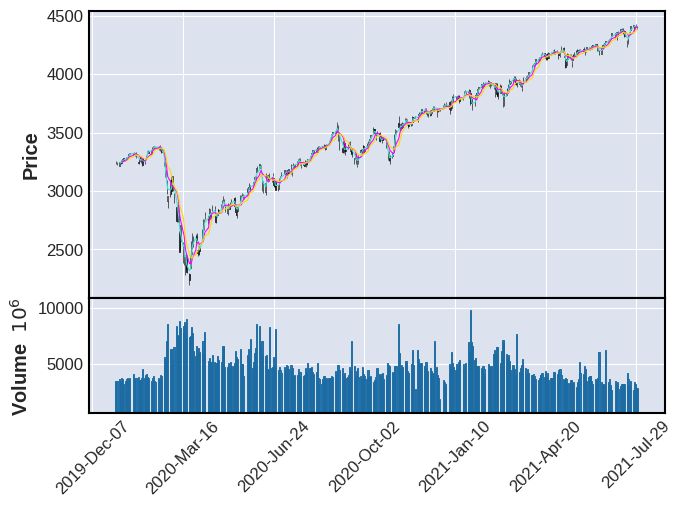

In [148]:
mpf.plot(data, type='candle', mav= (3,6,9), volume=True, show_nontrading=True)
#Visualize the closing price history
#plt.figure(figsize=(16,8))
#plt.title('Close Price History')
#plt.plot(df['Close'])
#plt.xlabel('Date',fontsize=18)
#plt.ylabel('Close Price USD($)',fontsize=18)
#plt.show()

In [149]:
#Create a new dataframe with only the 'Close column'
data = data.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on 
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

319

In [151]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data



array([[0.46704666],
       [0.45651986],
       [0.46175119],
       [0.45758619],
       [0.46484974],
       [0.47475861],
       [0.47047931],
       [0.48090532],
       [0.47862605],
       [0.48143631],
       [0.49403186],
       [0.49989485],
       [0.49585344],
       [0.4962928 ],
       [0.49802745],
       [0.48426478],
       [0.46053825],
       [0.47546347],
       [0.4741636 ],
       [0.47885947],
       [0.4522496 ],
       [0.46295943],
       [0.48523513],
       [0.50221524],
       [0.50729103],
       [0.4990206 ],
       [0.51017906],
       [0.51276953],
       [0.52270131],
       [0.52017945],
       [0.52302625],
       [0.51850894],
       [0.52576779],
       [0.51985451],
       [0.50361579],
       [0.45241889],
       [0.40771207],
       [0.40230218],
       [0.33931079],
       [0.32807913],
       [0.39032913],
       [0.35057451],
       [0.40858632],
       [0.35998905],
       [0.33638622],
       [0.23303592],
       [0.29513026],
       [0.230

In [152]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i <= 60:
    print (x_train)
    print (y_train)
    print ()

[array([0.46704666, 0.45651986, 0.46175119, 0.45758619, 0.46484974,
       0.47475861, 0.47047931, 0.48090532, 0.47862605, 0.48143631,
       0.49403186, 0.49989485, 0.49585344, 0.4962928 , 0.49802745,
       0.48426478, 0.46053825, 0.47546347, 0.4741636 , 0.47885947,
       0.4522496 , 0.46295943, 0.48523513, 0.50221524, 0.50729103,
       0.4990206 , 0.51017906, 0.51276953, 0.52270131, 0.52017945,
       0.52302625, 0.51850894, 0.52576779, 0.51985451, 0.50361579,
       0.45241889, 0.40771207, 0.40230218, 0.33931079, 0.32807913,
       0.39032913, 0.35057451, 0.40858632, 0.35998905, 0.33638622,
       0.23303592, 0.29513026, 0.23066502, 0.11132775, 0.21676971,
       0.06807176, 0.13354847, 0.07355037, 0.07871756, 0.03090303,
       0.        , 0.09608229, 0.10900278, 0.17971998, 0.13916888])]
[0.1781546145809474]



In [153]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(259, 60, 1)

In [154]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))



In [155]:
#Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [156]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

259/259 [==============================] - 12s 33ms/step - loss: 0.0137


In [157]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [158]:
#Convert the data to a numpy array
x_test = np.array(x_test)



In [159]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [160]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

87.37727761570412

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


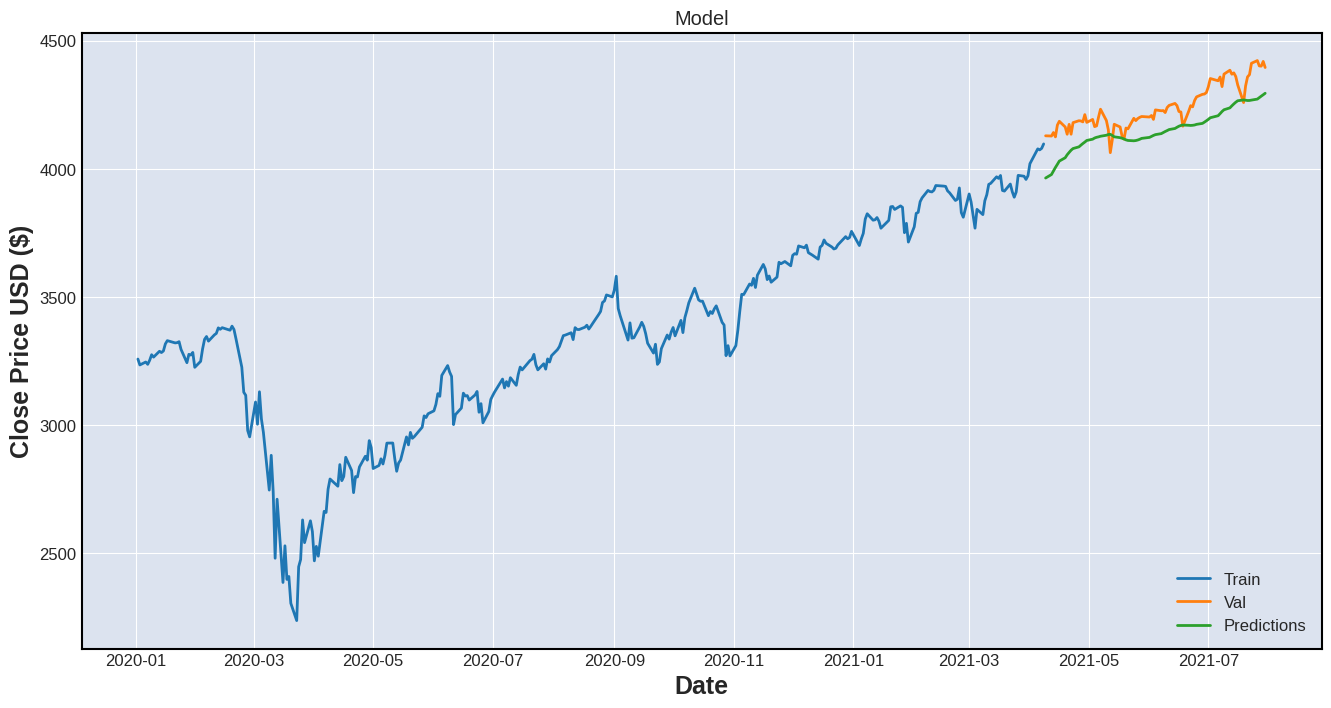

In [161]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualise the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [162]:
#show the valid and predicted return
valid

,Close,Predictions
Date,,
2021-04-09,4128.799805,3964.049561
2021-04-12,4127.990234,3977.783203
2021-04-13,4141.589844,3991.514648
2021-04-14,4124.660156,4005.177002
2021-04-15,4170.419922,4017.452881
...,...,...
2021-07-26,4422.299805,4272.046875
2021-07-27,4401.459961,4277.777832
2021-07-28,4400.640137,4283.535645


In [163]:
#get the quote
apple_quote = yf.download('^GSPC', start=start_date, end=end_date)
#Create a new dataframe
new_data = apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_data[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[*********************100%***********************]  1 of 1 completed
[[4299.518]]
